In [6]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("dhoogla/unswnb15")
df = pd.read_parquet(path)
print("Path to dataset files:", path)
print(df.head())

Path to dataset files: /root/.cache/kagglehub/datasets/dhoogla/unswnb15/versions/5
        dur proto service state  spkts  dpkts  sbytes  dbytes          rate  \
0  0.000011   udp       -   INT      2      0     496       0   90909.09375   
1  0.000008   udp       -   INT      2      0    1762       0  125000.00000   
2  0.000005   udp       -   INT      2      0    1068       0  200000.00000   
3  0.000006   udp       -   INT      2      0     900       0  166666.65625   
4  0.000010   udp       -   INT      2      0    2126       0  100000.00000   

         sload  ...  trans_depth  response_body_len  ct_src_dport_ltm  \
0  180363632.0  ...            0                  0                 1   
1  881000000.0  ...            0                  0                 1   
2  854400000.0  ...            0                  0                 1   
3  600000000.0  ...            0                  0                 2   
4  850400000.0  ...            0                  0                 2   

   

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the UNSW-NB15 dataset
  # Replace with actual dataset path

# Drop irrelevant or redundant columns (modify based on dataset)
columns_to_drop = ['id', 'attack_cat']  # Example, adjust as needed
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical data
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numerical data
      df[col]=pd.to_numeric(df[col],errors="coerce")
      df[col].fillna(df[col].mean(), inplace=True)

categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the processed dataset
df.to_csv("UNSW_NB15_preprocessed.csv", index=False)

print("Data Preprocessing Completed. Processed file saved as UNSW_NB15_preprocessed.csv")


<ipython-input-11-afeec0bc29af>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:

Data Preprocessing Completed. Processed file saved as UNSW_NB15_preprocessed.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3610 - loss: nan - val_accuracy: 0.3624 - val_loss: nan
Epoch 2/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.3617 - loss: nan - val_accuracy: 0.3624 - val_loss: nan
Epoch 3/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.3603 - loss: nan - val_accuracy: 0.3624 - val_loss: nan
Epoch 4/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.3599 - loss: nan - val_accuracy: 0.3624 - val_loss: nan
Epoch 5/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.3607 - loss: nan - val_accuracy: 0.3624 - val_loss: nan
Epoch 6/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.3614 - loss: nan - val_accuracy: 0.3624 - val_loss: nan
Epoch 7/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.3606 - loss: nan - val_accuracy: 0.3624 - val_loss: nan
Epoch 8/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.3624 - loss: nan - val_accuracy: 0.3624 - val_loss: nan


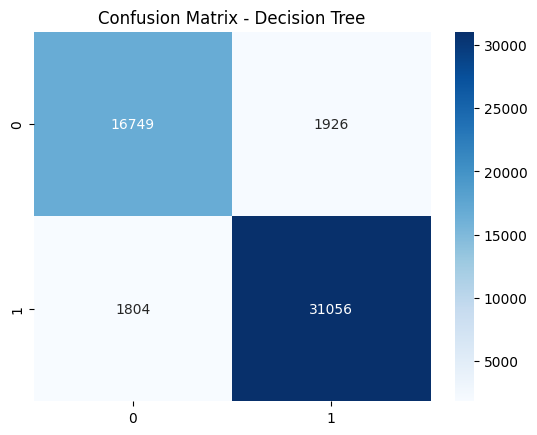


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     18675
           1       0.95      0.95      0.95     32860

    accuracy                           0.94     51535
   macro avg       0.94      0.94      0.94     51535
weighted avg       0.94      0.94      0.94     51535



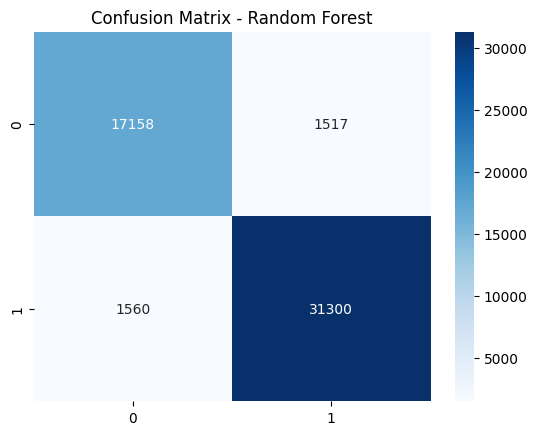

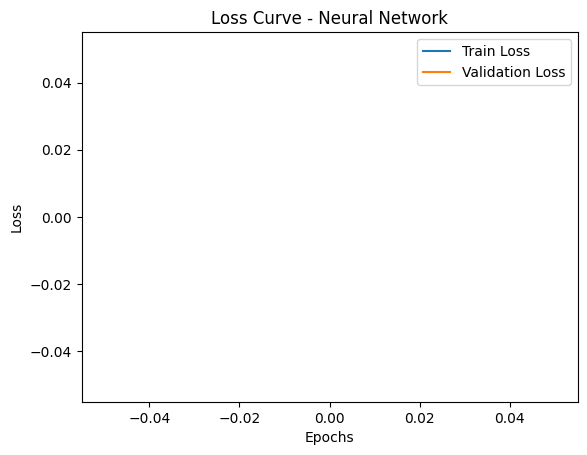

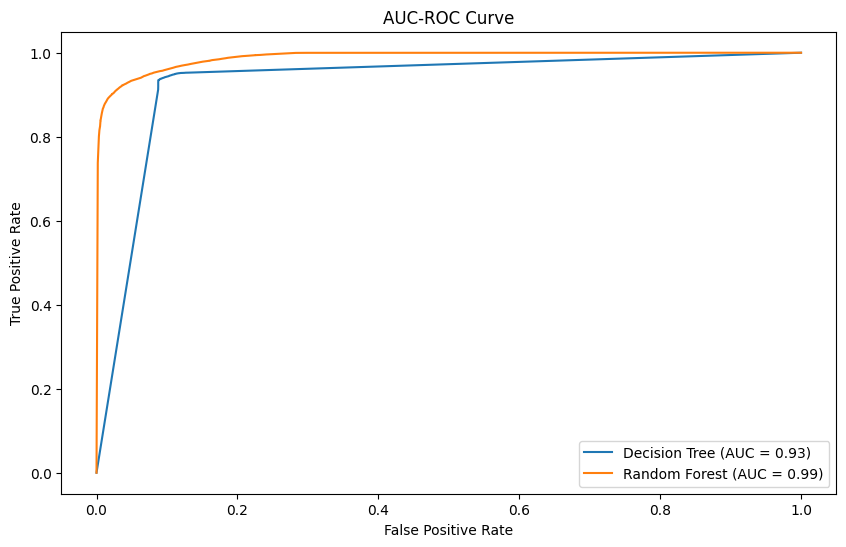

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset

# Replace with actual dataset

# Preprocessing
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluate_model(dt_model, X_test, y_test, "Decision Tree")
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Loss Curve for Neural Network
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve - Neural Network")
plt.legend()
plt.show()

# AUC-ROC Curve
models = {'Decision Tree': dt_model, 'Random Forest': rf_model}
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()


